In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/Кристина/regression_kaggle_competition/')

# Препроцессинг

In [3]:
ID_COL = ['Id']
REAL_COL = ['LotFrontage', 'MasVnrArea']
INT_COL = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 
OBJ_COL = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
 'SaleType', 'SaleCondition', 'Street', 'Utilities', 'CentralAir']

OHE_COL = ['Street', 'CentralAir']

ORDER_COL_NAN = ['BsmtQual',
 'BsmtCond', 'GarageQual', 'GarageCond']
ORDER_COL = ['ExterQual','ExterCond', 'HeatingQC', 'KitchenQual']
ORDER_COL_AN = ['BsmtExposure']
ORDER_COL_BSMT = ['BsmtFinType1', 'BsmtFinType2']
ORDER_COL_CARAGE = ['GarageFinish']

CAT_COL = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'SaleType',
       'SaleCondition', 'Utilities']

TARGET_COL = ['SalePrice']


In [4]:
train_data = pd.read_csv('data/raw/train.csv')

In [5]:
train_data.isna().sum().sum()

6965

In [6]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
import sys
sys.path.insert(0, 'C:\\Users\\Кристина\\regression_kaggle_competition')
from src.data.preprocess1 import preprocess_data


In [10]:
d = preprocess_data(train_data)
d.isna().sum().sum()


0

In [182]:
for i in d:
    print(d.isna().sum())

MSSubClass          0
MSZoning         1370
LotFrontage         0
Street              0
LotShape         1370
                 ... 
MoSold              0
YrSold              0
SaleType         1370
SaleCondition    1370
SalePrice           0
Length: 63, dtype: int64
MSSubClass          0
MSZoning         1370
LotFrontage         0
Street              0
LotShape         1370
                 ... 
MoSold              0
YrSold              0
SaleType         1370
SaleCondition    1370
SalePrice           0
Length: 63, dtype: int64
MSSubClass          0
MSZoning         1370
LotFrontage         0
Street              0
LotShape         1370
                 ... 
MoSold              0
YrSold              0
SaleType         1370
SaleCondition    1370
SalePrice           0
Length: 63, dtype: int64
MSSubClass          0
MSZoning         1370
LotFrontage         0
Street              0
LotShape         1370
                 ... 
MoSold              0
YrSold              0
SaleType         1370
S

In [163]:
def drop_id(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(ID_COL, axis=1)
    return df

In [164]:
def extract_target(df: pd.DataFrame):
    df, target = df.drop(TARGET_COL, axis=1), df[TARGET_COL]
    return df, target

In [165]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [175]:
def preprocess_real_col(df: pd.DataFrame) -> pd.DataFrame:
    df[REAL_COL[0]] = df[REAL_COL[0]].fillna(value=0.0)
    selected_rows = df[df[REAL_COL[1]].isnull()].index.to_list()
    df = df.drop(selected_rows, axis=0)
    df[REAL_COL] = df[REAL_COL].astype(np.float32)

    return df



In [167]:
def preprocess_int_col(df: pd.DataFrame) -> pd.DataFrame:
    df[INT_COL] = df[INT_COL].astype(np.int32)
    return df

In [168]:
def clear_col_list(lst: list, clear_lst:list) -> list:
    for i in clear_lst:
        lst.remove(i)
    return lst

In [169]:
def preprocess_obj_col(df: pd.DataFrame) -> pd.DataFrame:
    drop_column = df[OBJ_COL].loc[:, (df[OBJ_COL].isna().sum() > 200).values].columns.to_list()
    df = df.drop(drop_column, axis=1)

    return df

In [170]:
def preprocess_ohe_col(df: pd.DataFrame) -> pd.DataFrame:
    df[OHE_COL[0]] = df[OHE_COL[0]].replace(['Pave', 'Grvl'], [1, 0]).astype(np.int8)
    df[OHE_COL[1]] = df[OHE_COL[1]].replace(['Y', 'N'], [1, 0]).astype(np.int8)
    return df

In [171]:
from cmath import nan

def preprocess_order_nan_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_NAN] = df[ORDER_COL_NAN].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', nan], [5, 4, 3, 2, 1, 0]).astype(np.int8)
    return df
def preprocess_order_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL] = df[ORDER_COL].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5, 4, 3, 2, 1]).astype(np.int8)
    return df
def preprocess_order_an_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_AN] = df[ORDER_COL_AN].replace(['Gd', 'Av', 'Mn', 'No', nan], [4, 3, 2, 1, 0]).astype(np.int8)
    return df
def preprocess_order_bsmt_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_BSMT] = df[ORDER_COL_BSMT].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', nan], [6, 5, 4, 3, 2, 1, 0]).astype(np.int8)
    return df
def preprocess_order_garage_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_CARAGE] = df[ORDER_COL_CARAGE].replace(['Fin', 'RFn', 'Unf', nan], [3, 2, 1, 0]).astype(np.int8)
    return df

In [172]:
def preprocess_cat_col(df: pd.DataFrame) -> pd.DataFrame:
    selected_rows = train_data[train_data['GarageType'].isnull()].index.to_list()
    df = df.drop(selected_rows, axis=0)
    selected_rows = train_data[train_data['Electrical'].isnull()].index.to_list()
    df = df.drop(selected_rows, axis=0)
    return df



In [176]:
def preprocess_data2(df: pd.DataFrame) -> pd.DataFrame:
    df = drop_id(df)
    df = preprocess_real_col(df)
    df = preprocess_int_col(df)
    df = preprocess_obj_col(df)
    df = preprocess_ohe_col(df)
    df = preprocess_order_nan_col(df)
    df = preprocess_order_col(df)
    df = preprocess_order_an_col(df)
    df = preprocess_order_bsmt_col(df)
    df = preprocess_order_garage_col(df)
    df = preprocess_cat_col(df)
    return df

In [115]:
train_data = preprocess_data(train_data)

In [116]:
train_data, target_data = extract_target(train_data)

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1370 non-null   int32  
 1   MSZoning       1370 non-null   object 
 2   LotFrontage    1370 non-null   float32
 3   LotArea        1370 non-null   int32  
 4   Street         1370 non-null   int8   
 5   LotShape       1370 non-null   object 
 6   LandContour    1370 non-null   object 
 7   Utilities      1370 non-null   object 
 8   LotConfig      1370 non-null   object 
 9   LandSlope      1370 non-null   object 
 10  Neighborhood   1370 non-null   object 
 11  Condition1     1370 non-null   object 
 12  Condition2     1370 non-null   object 
 13  BldgType       1370 non-null   object 
 14  HouseStyle     1370 non-null   object 
 15  OverallQual    1370 non-null   int32  
 16  OverallCond    1370 non-null   int32  
 17  YearBuilt      1370 non-null   int32  
 18  YearRemo

In [66]:
target_val_data.shape

(453, 1)

# Обучение модели

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

In [94]:
target_data.describe()


,SalePrice
count,1370.000000
mean,185194.797080
std,78899.705642
min,35311.000000
25%,133925.000000
50%,167000.000000
75%,217875.000000
max,755000.000000


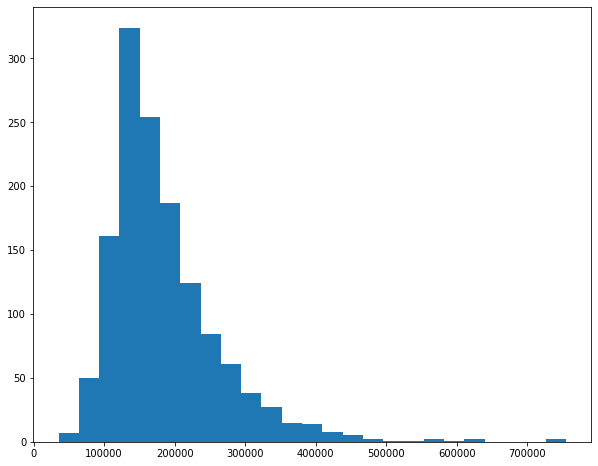

In [95]:
plt.figure(figsize=(10, 8))
plt.hist(target_data, bins=25);

In [96]:
def quality(y, y_pred):
    print("MSE:", mean_squared_error(y, y_pred))
    print("RMSE:", mean_squared_error(y, y_pred)**(1/2))
    print("MAE:", mean_absolute_error(y, y_pred))
    print("R2:", r2_score(y, y_pred))

In [ ]:
lr = LinearRegression()
lr.fit(train_data, target_train_data)
y_pred = lr.predict(val_data)
quality(target_val_data, y_pred)

In [ ]:
dr = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
dr.fit(train_data, target_train_data)
y_pred = dr.predict(val_data)
quality(target_val_data, y_pred)

In [ ]:
def train_fold( train_data: pd.DataFrame, target_data: pd.DataFrame, 
    kfold_params: dict, model_params: dict):
    
    kfold = KFold(**kfold_params)
    models = []
    oof_reg = np.zeros((len(X), 2))
    feature_importances = []
    for k, (indices_train, indices_valid) in enumerate(kfold.split(X)):
        
        X_train = train_data.iloc[indices_train].copy().reset_index(drop=True)
        y_train = target_data.iloc[indices_train].copy().reset_index(drop=True)
        
        X_valid = train_data.iloc[indices_valid].copy().reset_index(drop=True)
        y_valid = target_data.iloc[indices_valid].copy().reset_index(drop=True)
        
        print(f'# of X_train: {X_train.shape}')
        print(f'# of X_valid: {X_valid.shape}')
       
        pool_train = Pool(X_train, y_train, cat_features=CAT_COL)
        pool_valid = Pool(X_valid, y_valid, cat_features=CAT_COL)
        model = CatBoostRegressor(**model_params)
        
        model.fit(
            pool_train,
            eval_set=pool_valid,
            use_best_model=True,
            verbose=100,
            plot=True,
        )
        
        reg_train = model.predict(pool_train)
        reg_valid = model.predict(pool_valid)
        
        oof_reg[indices_valid, 0] = y_valid
        oof_reg[indices_valid, 1] = reg_valid
        

        
        models.append((preprocessor, model))
        
        feature_importances.append(
            pd.DataFrame(
                model.get_feature_importance(pool_train, type="PredictionValuesChange"),
                index=numerical_columns+categorical_columns,
                columns=[f'feature_importance_{k}']
            )
        )
    print(f'oof rmse = {np.sqrt(np.mean(np.diff(oof_reg, axis=1)**2)):.10f}')
    print('Done!')
    feature_importances = pd.concat(feature_importances, axis=1)
    return models, feature_importances


kfold_params = {
    'n_splits': 5,
    'shuffle': True,
    'random_state': 42
}

model_params = {
    'depth': 6,
    'learning_rate': 0.01,
    'early_stopping_rounds': 100,
    'iterations': 10000,
    'loss_function': 'RMSE',
    'subsample': 0.5,
    'random_seed': 42,
}

y = Xy.pop('log(1+SalePrice)')
X = Xy.copy()
models, feature_importances = train_fold(X, y, kfold_params, model_params)

In [121]:
import pickle

metrics = pickle.load(open('reports/figures/metrics.json', 'rb'))

In [122]:
metrics

{'rmse_catboost': 24120.93870118979,
 'rmse_sklearn': 55407.21282317446,
 'mae_catboost': 15931.406735416153,
 'mae_sklearn': 35687.2947080292}